### Importaci√≥n de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



['producto', 'categor√≠a_del_producto', 'precio', 'costo_de_env√≠o', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificaci√≥n', 'm√©todo_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categor√≠a_del_producto', 'precio', 'costo_de_env√≠o', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificaci√≥n', 'm√©todo_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categor√≠a_del_producto', 'precio', 'costo_de_env√≠o', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificaci√≥n', 'm√©todo_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categor√≠a_del_producto', 'precio', 'costo_de_env√≠o', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificaci√≥n', 'm√©todo_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
Facturaci√≥n total por tienda:
 tienda
Tienda 1    3.422718e+09
Tienda 2    3.337189e+09
Tienda 3    3.243817e+09
Tienda 4    3.098827e+09
Name: facturacion, dtype: float64


<ipython-input-34-f95d081bf603>:24: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["fecha"] = pd.to_datetime(df["fecha_de_compra"])
<ipython-input-34-f95d081bf603>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_por_tienda.values, y=facturacion_por_tienda.index, palette="viridis")


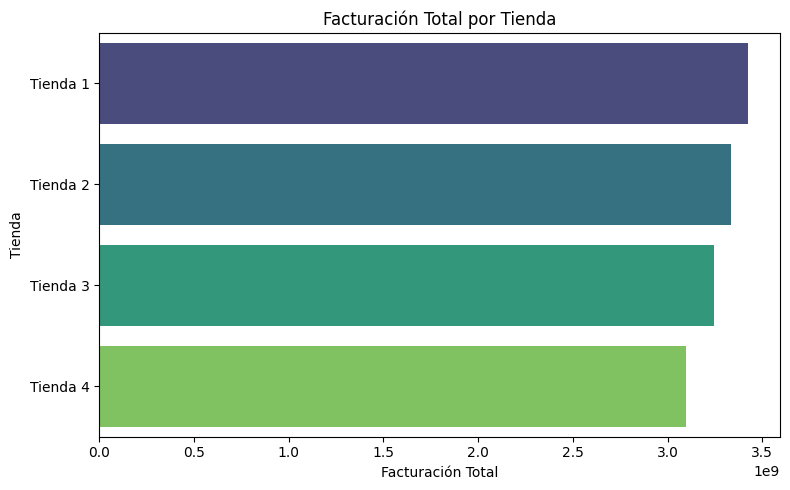

Top 10 productos por facturaci√≥n:
 producto
TV LED UHD 4K       1.268357e+09
Iphone 15           1.248247e+09
Refrigerador        1.179706e+09
Smart TV            8.380150e+08
Lavadora de ropa    7.509448e+08
Secadora de ropa    6.847062e+08
Lavavajillas        6.738366e+08
Tablet ABXY         6.129845e+08
Celular ABXY        4.538381e+08
Bater√≠a             4.234041e+08
Name: facturacion, dtype: float64


<ipython-input-34-f95d081bf603>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_producto.values, y=facturacion_producto.index, palette="flare")


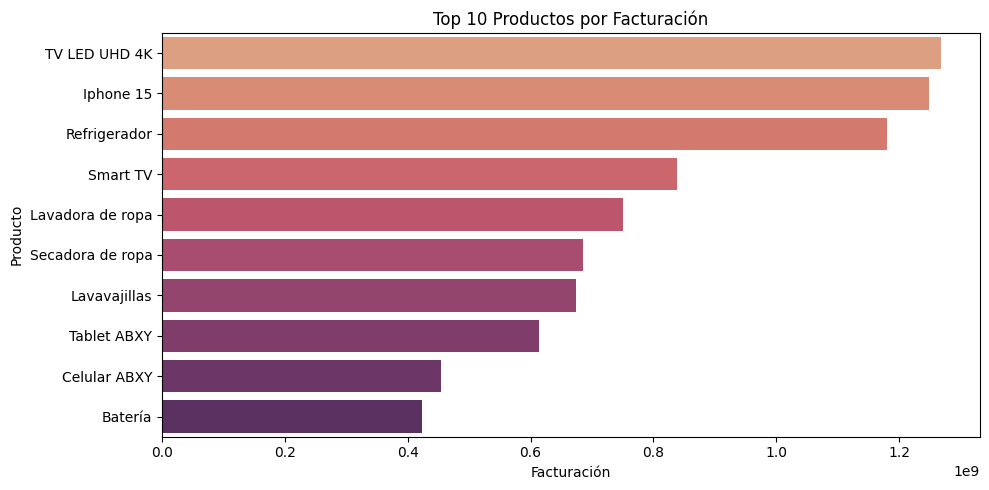

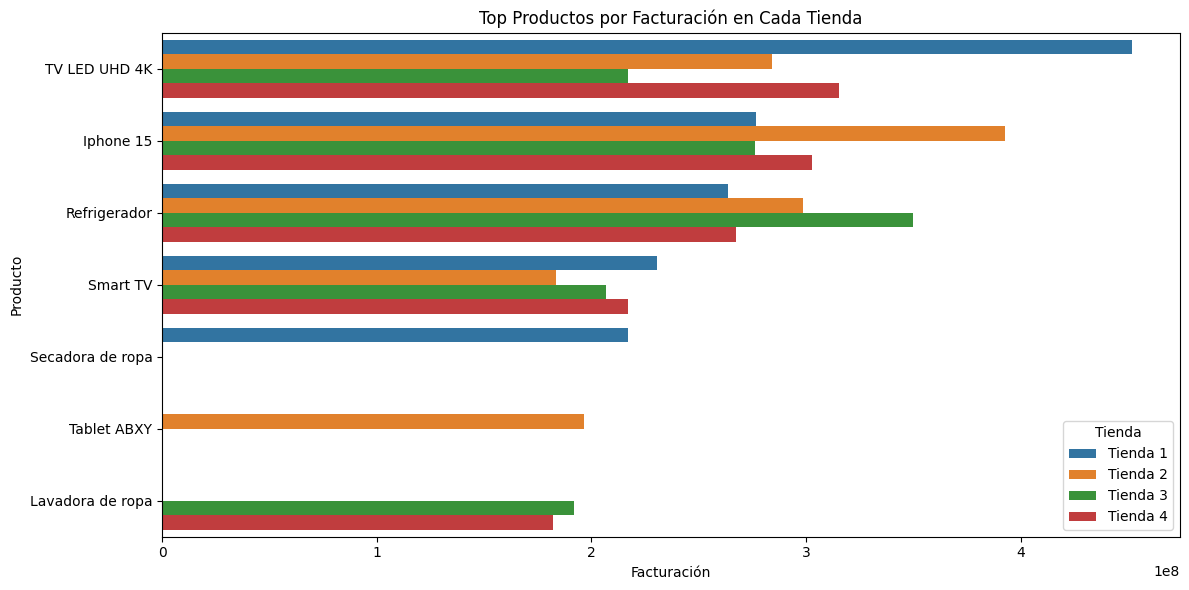

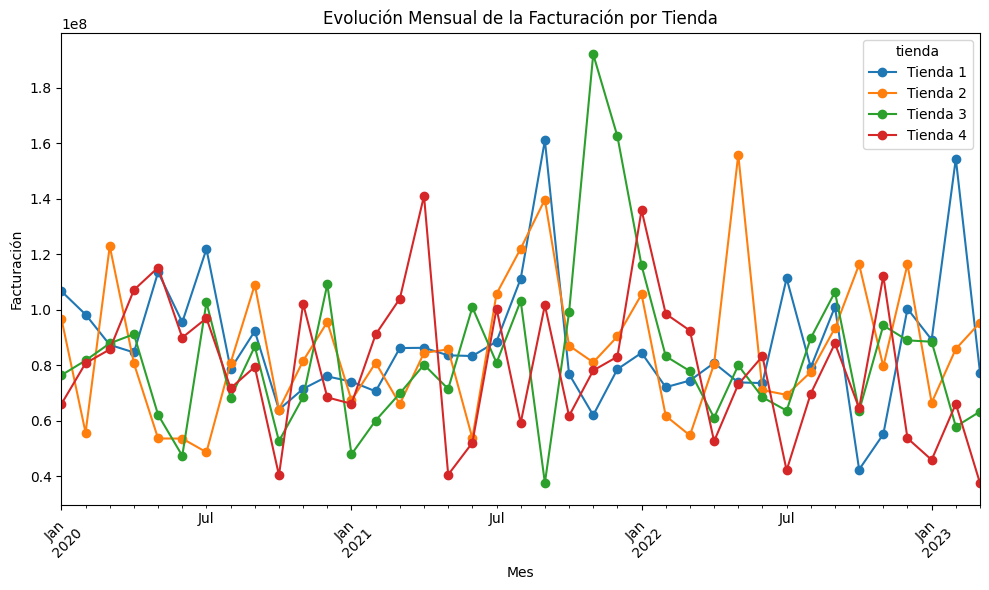

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar columna de tienda
tienda["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Limpieza de columnas
for df in [tienda, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    print(df.columns.tolist())

# Unir todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Procesamiento de la fecha
df["fecha"] = pd.to_datetime(df["fecha_de_compra"])

# Crear columna de facturaci√≥n por venta (precio x cantidad)
df["facturacion"] = df["precio"] * df["cantidad_de_cuotas"]

# Agrupaci√≥n por tienda
facturacion_por_tienda = df.groupby("tienda")["facturacion"].sum().sort_values(ascending=False)
print("Facturaci√≥n total por tienda:\n", facturacion_por_tienda)

# Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(x=facturacion_por_tienda.values, y=facturacion_por_tienda.index, palette="viridis")
plt.title("Facturaci√≥n Total por Tienda")
plt.xlabel("Facturaci√≥n Total")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

# üì¶ An√°lisis por Producto
facturacion_producto = df.groupby("producto")["facturacion"].sum().sort_values(ascending=False).head(10)
print("Top 10 productos por facturaci√≥n:\n", facturacion_producto)

plt.figure(figsize=(10, 5))
sns.barplot(x=facturacion_producto.values, y=facturacion_producto.index, palette="flare")
plt.title("Top 10 Productos por Facturaci√≥n")
plt.xlabel("Facturaci√≥n")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# üîÅ An√°lisis cruzado: Tienda vs Producto (TOP 5 por tienda)
facturacion_cruzada = df.groupby(["tienda", "producto"])["facturacion"].sum().reset_index()
top_productos_por_tienda = facturacion_cruzada.sort_values("facturacion", ascending=False).groupby("tienda").head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_productos_por_tienda, x="facturacion", y="producto", hue="tienda")
plt.title("Top Productos por Facturaci√≥n en Cada Tienda")
plt.xlabel("Facturaci√≥n")
plt.ylabel("Producto")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# Evoluci√≥n de la facturaci√≥n en el tiempo
df_mes = df.groupby([df["fecha"].dt.to_period("M"), "tienda"])["facturacion"].sum().unstack()
df_mes.plot(figsize=(10, 6), marker="o")
plt.title("Evoluci√≥n Mensual de la Facturaci√≥n por Tienda")
plt.ylabel("Facturaci√≥n")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df.drop(columns=["fecha_de_compra"], inplace=True)

# 2. Ventas por categor√≠a

Facturaci√≥n total por categor√≠a:
 categor√≠a_del_producto
Electr√≥nicos               4.889815e+09
Electrodom√©sticos          4.019072e+09
Muebles                    2.221981e+09
Instrumentos musicales     1.044612e+09
Deportes y diversi√≥n       4.320055e+08
Juguetes                   2.116156e+08
Art√≠culos para el hogar    1.703604e+08
Libros                     1.130887e+08
Name: facturacion, dtype: float64


<ipython-input-35-da2fb3f4496e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette="magma")


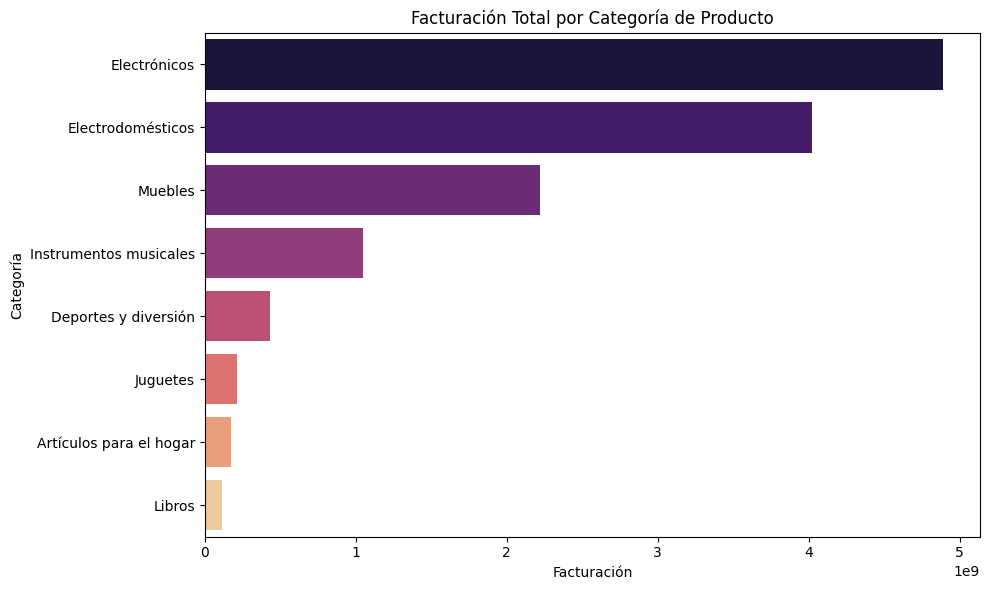

In [35]:
# üóÇÔ∏è An√°lisis por Categor√≠a de Producto
facturacion_categoria = df.groupby("categor√≠a_del_producto")["facturacion"].sum().sort_values(ascending=False)
print("Facturaci√≥n total por categor√≠a:\n", facturacion_categoria)

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette="magma")
plt.title("Facturaci√≥n Total por Categor√≠a de Producto")
plt.xlabel("Facturaci√≥n")
plt.ylabel("Categor√≠a")
plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


Calificaci√≥n promedio por tienda:
 tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: calificaci√≥n, dtype: float64


<ipython-input-36-fc68f85ae6b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio.values, y=calificacion_promedio.index, palette="viridis")


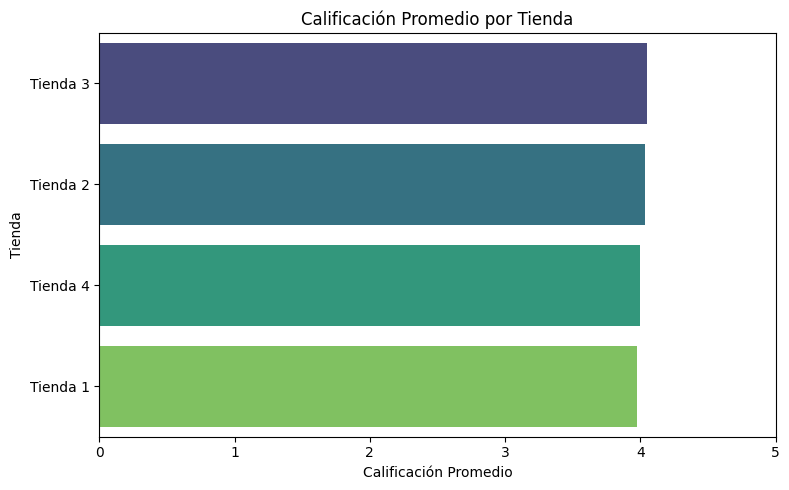

In [36]:
# ‚≠ê Calificaci√≥n Promedio por Tienda
calificacion_promedio = df.groupby("tienda")["calificaci√≥n"].mean().sort_values(ascending=False)
print("Calificaci√≥n promedio por tienda:\n", calificacion_promedio)

# Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(x=calificacion_promedio.values, y=calificacion_promedio.index, palette="viridis")
plt.title("Calificaci√≥n Promedio por Tienda")
plt.xlabel("Calificaci√≥n Promedio")
plt.ylabel("Tienda")
plt.xlim(0, 5)  # Escala de calificaci√≥n
plt.tight_layout()
plt.show()

In [37]:
calificacion_total = df["calificaci√≥n"].mean()
print(f"Calificaci√≥n promedio total de la tienda (todas las sucursales): {calificacion_total:.2f}")

Calificaci√≥n promedio total de la tienda (todas las sucursales): 4.01


# 4. Productos m√°s y menos vendidos

Top 10 Productos M√°s Vendidos por Facturaci√≥n:
 producto
TV LED UHD 4K       1.268357e+09
Iphone 15           1.248247e+09
Refrigerador        1.179706e+09
Smart TV            8.380150e+08
Lavadora de ropa    7.509448e+08
Secadora de ropa    6.847062e+08
Lavavajillas        6.738366e+08
Tablet ABXY         6.129845e+08
Celular ABXY        4.538381e+08
Bater√≠a             4.234041e+08
Name: facturacion, dtype: float64
Top 10 Productos Menos Vendidos por Facturaci√≥n:
 producto
Bal√≥n de voleibol          24754800.0
Vaso t√©rmico               24463500.0
Mu√±eca beb√©                23434700.0
Bloques de construcci√≥n    19174000.0
Dashboards con Power BI    19158500.0
Ajedrez de madera          15188200.0
Set de vasos               14566700.0
Cuerda para saltar          8541300.0
Dinosaurio Rex              8200700.0
Cubo m√°gico 8x8             7259600.0
Name: facturacion, dtype: float64


<ipython-input-38-ba1fada7fc52>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="Blues_d")


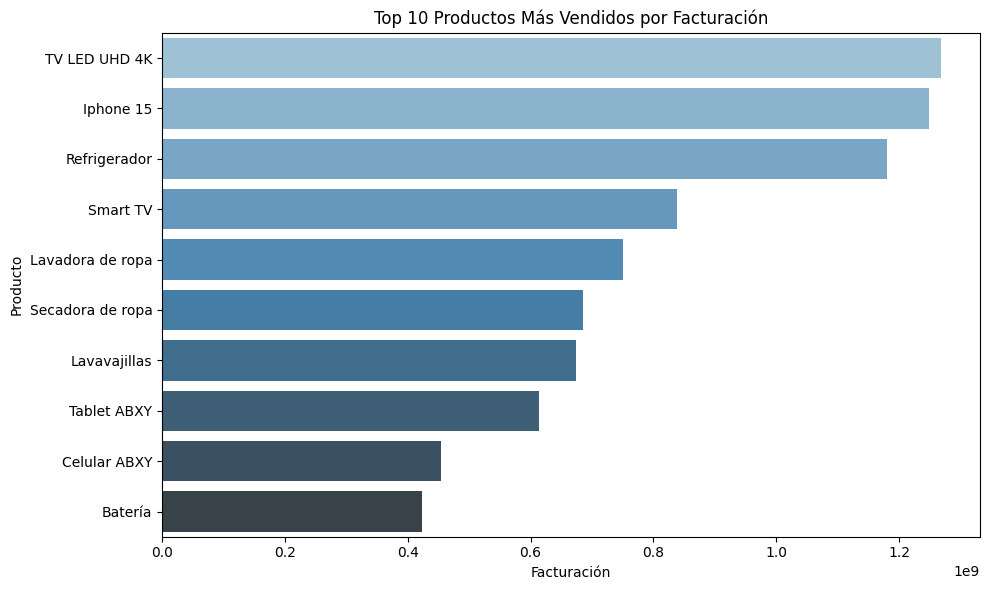

<ipython-input-38-ba1fada7fc52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_menos_vendidos.values, y=productos_menos_vendidos.index, palette="Reds_d")


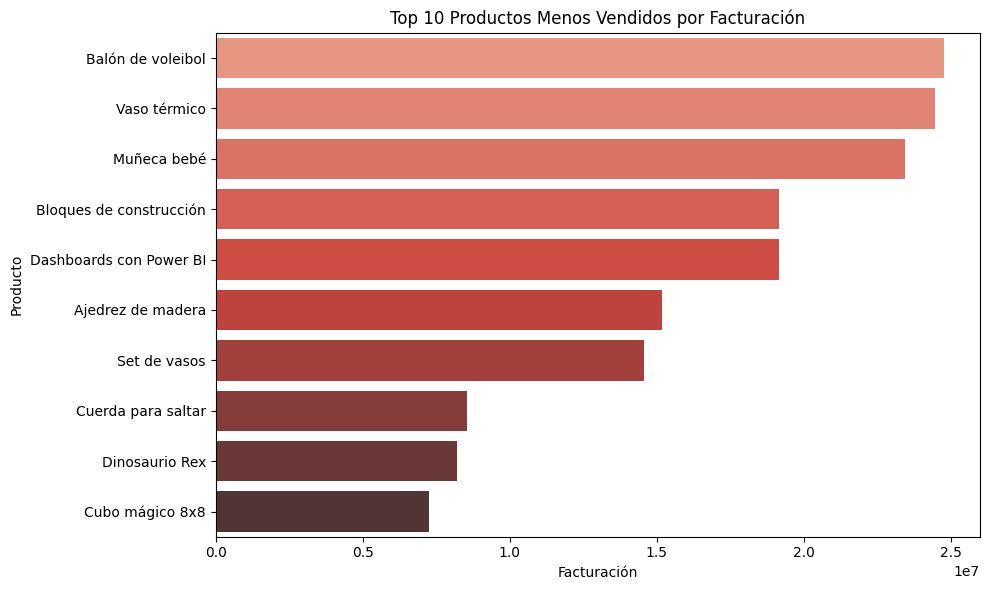

In [38]:
# üìä Productos M√°s y Menos Vendidos por Facturaci√≥n
productos_ventas = df.groupby("producto")["facturacion"].sum().sort_values(ascending=False)

# Los 10 productos m√°s vendidos
productos_mas_vendidos = productos_ventas.head(10)
print("Top 10 Productos M√°s Vendidos por Facturaci√≥n:\n", productos_mas_vendidos)

# Los 10 productos menos vendidos (los primeros 10 despu√©s de ordenar por valores m√°s bajos)
productos_menos_vendidos = productos_ventas.tail(10)
print("Top 10 Productos Menos Vendidos por Facturaci√≥n:\n", productos_menos_vendidos)

# Visualizaci√≥n de los 10 m√°s vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="Blues_d")
plt.title("Top 10 Productos M√°s Vendidos por Facturaci√≥n")
plt.xlabel("Facturaci√≥n")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# Visualizaci√≥n de los 10 menos vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_menos_vendidos.values, y=productos_menos_vendidos.index, palette="Reds_d")
plt.title("Top 10 Productos Menos Vendidos por Facturaci√≥n")
plt.xlabel("Facturaci√≥n")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# 5. Env√≠o promedio por tienda

Env√≠o promedio por tienda:
 tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: costo_de_env√≠o, dtype: float64


<ipython-input-39-72864cb44739>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio_tienda.values, y=envio_promedio_tienda.index, palette="crest")


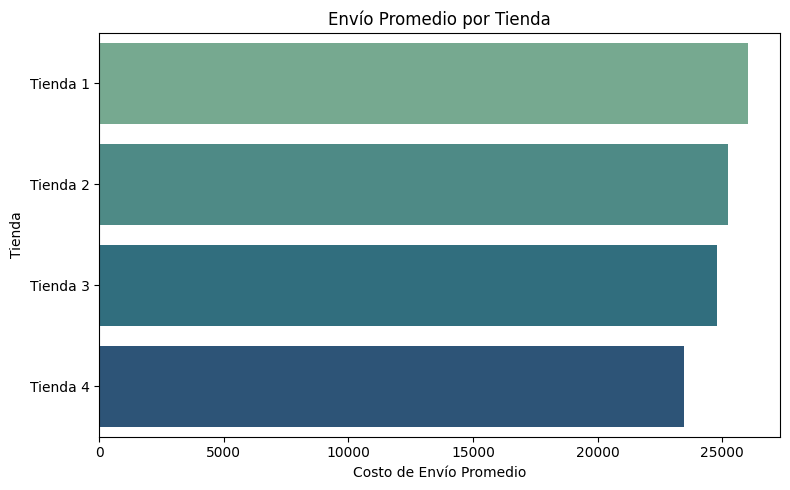

In [39]:
# üí∏ Env√≠o Promedio por Tienda
envio_promedio_tienda = df.groupby("tienda")["costo_de_env√≠o"].mean().sort_values(ascending=False)
print("Env√≠o promedio por tienda:\n", envio_promedio_tienda)

# Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(x=envio_promedio_tienda.values, y=envio_promedio_tienda.index, palette="crest")
plt.title("Env√≠o Promedio por Tienda")
plt.xlabel("Costo de Env√≠o Promedio")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

üîù √çndice de conveniencia por tienda:
           facturaci√≥n_total  calificaci√≥n_promedio  env√≠o_promedio  \
tienda                                                               
Tienda 3       3.243817e+09               4.048326    24805.680373   
Tienda 2       3.337189e+09               4.037304    25216.235693   
Tienda 4       3.098827e+09               3.995759    23459.457167   
Tienda 1       3.422718e+09               3.976685    26018.609580   

          √≠ndice_conveniencia  
tienda                         
Tienda 3             1.921608  
Tienda 2             1.895619  
Tienda 4             1.266247  
Tienda 1             1.000000  


<ipython-input-43-f92299e5a993>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


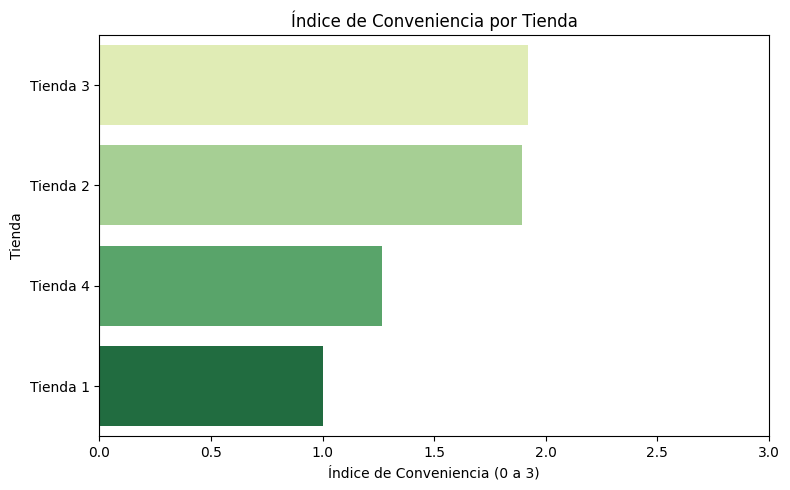

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Recalcular m√©tricas clave por tienda
tienda_metrics = df.groupby("tienda").agg({
    "facturacion": "sum",
    "calificaci√≥n": "mean",
    "costo_de_env√≠o": "mean"
}).rename(columns={
    "facturacion": "facturaci√≥n_total",
    "calificaci√≥n": "calificaci√≥n_promedio",
    "costo_de_env√≠o": "env√≠o_promedio"
})

# Normalizamos los valores
scaler = MinMaxScaler()

# Normalizar facturaci√≥n y calificaci√≥n (m√°s es mejor)
tienda_metrics[["facturacion_norm", "calificacion_norm"]] = scaler.fit_transform(
    tienda_metrics[["facturaci√≥n_total", "calificaci√≥n_promedio"]]
)

# Normalizar env√≠o (menos es mejor ‚Üí invertir)
envio_norm = scaler.fit_transform(tienda_metrics[["env√≠o_promedio"]])
tienda_metrics["envio_norm"] = 1 - envio_norm  # porque menor env√≠o = mejor

# Calcular √≠ndice de conveniencia
tienda_metrics["√≠ndice_conveniencia"] = (
    tienda_metrics["facturacion_norm"] +
    tienda_metrics["calificacion_norm"] +
    tienda_metrics["envio_norm"]
)

# Ordenar
tienda_metrics_sorted = tienda_metrics.sort_values("√≠ndice_conveniencia", ascending=False)

print("üîù √çndice de conveniencia por tienda:\n", tienda_metrics_sorted[["facturaci√≥n_total", "calificaci√≥n_promedio", "env√≠o_promedio", "√≠ndice_conveniencia"]])

# Visualizaci√≥n del √≠ndice de conveniencia
plt.figure(figsize=(8, 5))
sns.barplot(
    x=tienda_metrics_sorted["√≠ndice_conveniencia"],
    y=tienda_metrics_sorted.index,
    palette="YlGn"
)
plt.title("√çndice de Conveniencia por Tienda")
plt.xlabel("√çndice de Conveniencia (0 a 3)")
plt.ylabel("Tienda")
plt.xlim(0, 3)
plt.tight_layout()
plt.show()